In [344]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [382]:
# Importer les données 
df = pd.read_csv("train.csv")

In [383]:
df.head()

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_48,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2547.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Tỉnh Đồng Nai,Thành phố Biên Hòa,44.0,44.0,None,1,0.0,-1.0,...,False,True,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0
2,2,0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,Công nhân,0,1.0,3273.0,...,True,True,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0
3,3,0,Tỉnh Tuyên Quang,Thành phố Tuyên Quang,43.0,NaN,NaN,0,1.0,3991.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,None,0,1.0,1450.0,...,True,True,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0


In [384]:
df.shape #30000 lignes,64 colonnes #

(30000, 64)

In [385]:
df["label"].value_counts() # Premier observation : data_set train fortement déséquilibre #
# 1: non rembousé , 0: rembousé #

0    29514
1      486
Name: label, dtype: int64

In [386]:
df = df.dropna()

In [387]:
df.shape # Contient 15.515 lignes après avoir nettoyé les lignes contient les NA #

(15515, 64)

In [388]:
# Lower des text Jobs #
trans = []
for job in df.maCv:
    low = job.lower()
    trans.append(low)
    #print(trans)
df['Job'] = trans

In [389]:
# Enlever les accents #
import unidecode
df['Job'] = df['Job'].apply(unidecode.unidecode)

In [390]:
df['Job'].value_counts().head(n=10)

none                                      9964
cong nhan                                 1004
nhan vien                                  350
giao vien                                  254
cong nhan may cong nghiep                  113
cong nhan may                              112
cong nhan san xuat                          99
cong nhan vien                              51
nhan vien ban hang                          50
cong nhan van hanh may may cong nghiep      49
Name: Job, dtype: int64

In [451]:
t = []
for i in df["Job"]:
    a = i.split()
    if len(a) == 1:
        t.append('none')
    else:
        b = a[0] + " "+ a[1]
        t.append(b)
df["Job"] = t

In [392]:
len(df['Job'].value_counts())

435

In [401]:
df["Job"].value_counts()

none               10064
cong nhan           2633
nhan vien           1195
giao vien            338
ky thuat              54
can bo                53
ke toan               48
chuyen vien           43
lai xe                43
ky su                 36
cn may                28
tai xe                26
bao ve                25
dieu duong            24
phu viec              21
tro ly                19
lao dong              16
tho may               15
cn van                14
thu kho               14
to truong             14
coong nhaon           13
giam sat              12
can su                10
may cong              10
bi thu                 9
pho chu                9
tho son                8
hieu pho               8
chu tich               8
                   ...  
cn cat                 1
ks ql                  1
tri lieu               1
ktv so                 1
qu?n ly                1
lai cau                1
cn son                 1
cong nhan-duc          1
cn kho                 1


In [458]:
# Boucle pour corriger les métiers des clients #
job2 = []
for job in df["Job"]:
    if job=='none':
        job=='none'
    elif ((job.find('nhan vien') != (-1)) or (job.find('nv') != (-1)) or (job.find('nhon vion') != (-1)) or job.find('chuyen vien') != (-1)
        or job.find('ke toan') != (-1) or job.find('phu viec') !=(-1) or job.find('bao ve') !=(-1) or job=='giao dich' 
        or job=='van phong' or job=='phong vien' or job=='thu ky' or job=='tiep tan' or job=='ban hang' or job=='dich vu' or job=='assistant' or job=='van phong' or job=='van thu'
        or job=='kcs' or job=='thu ngan' or job=='operator' or job=='tong dai' or job=='giao dich' or job=='ke toan' or job=='kinh doanh' or job=='trainee' or job=='thuc tap sinh'
        or job=='tap vu' or job=='thu kho' or job =='thu quy' or job=='pha che' or job=='kt' or job=='k? thu?t' or job=='giao hang' or job=='giao nhan' or job=='kien truc' or job=='tu van'
        or job=='phuc vu' or job=='kiem hang' or job=='thong ke' or job =='xa doi' or job=='cao dang' or job=='kiem lam' or job=='tai chinh' or job=='sale assistant'
        or job=='hanh chanh' or job=='bien kich' or job=='nhaon vieon' or job=='kiem ngan' or job=='gdv quy' or job=='tiep vien' or job=='nha vien' or job=='huong dan' or job=='dai dien' or job=='tap su'
        or job=='tiep thi'):
        job = 'nhan vien'
    elif ((job.find('cong nhan') != (-1)) or (job.find('cn') != (-1)) or(job.find('c.n') != (-1)) or (job.find('coong nhaon') != (-1)) 
          or (job.find('tho may') != (-1)) or (job.find('may cong') != (-1)) or (job.find('tho son') != (-1)) 
          or (job.find('tho phu') != (-1)) or job.find('lao dong') != (-1) or job.find('cung nhon') != (-1) or job.find('tho dien') != (-1)
         or job == 'trung cap' or job == 'bao tri' or job.find('kho') != (-1) or job =='cao mu' or job =='thuy thu' or job=='thuyen vien' or job=='san xuat'
         or job == 'lao dong' or job =='con gnhan' or job.find('van hanh') !=(-1) or job=='dong goi' or job=='phu may' or job=='tho han' or job=='boc xep'
         or job=='bao mau' or job=='sua chua' or job=='tho ep' or job=='phu bep' or job=='lai may' or job=='phet keo' or job=='cat vai' or job=='tho ho'
         or job=='ep da' or job=='tho ui' or job=='thu cong' or job=='thanh hinh' or job=='khai thac' or job=='dung may' or job==''):
        job = 'cong nhan'
    elif ((job.find('giao vien') != (-1)) or (job.find('gv') != (-1)) or (job.find('giang vien') != (-1))
            or (job.find('hieu truong') != (-1)) or (job.find('hieu pho') != (-1))or job =='gioo vion' or job=='pho hieu'):
        job = 'giao vien'
    elif job.find('lai xe') !=(-1) or job=='phu xe' or job=='loi xe':
        job = 'nhan vien'
    elif ((job.find('ky su') != (-1)) or (job.find('ky thuat') != (-1)) or(job.find('can bo ky thuat') !=(-1)) or(job.find('ktv') !=(-1)) or (job.find('lap trinh vien') !=(-1)) 
        or job=='lap trinh' or job.find('cntk') != (-1) or job.find('technician') != (-1)):
        job = 'ky su'
    elif ((job.find('dieu duong') != (-1)) or (job.find('y ta') != (-1)) or(job.find('ho ly') != ((-1))) or (job.find('nu ho') !=(-1)) or (job.find('bac si') !=(-1)) 
          or (job.find('y si') !=(-1)) or (job.find('duoc sy') !=(-1)) or (job.find('y sy') != (-1)) or (job.find('bac sy') != (-1)) or job=='ho sinh' or job=='duoc si' or job=='cham soc'): 
        job = 'y te'
    elif job == 'ldpt' or job.find('ld')!=(-1):
        job = 'cong nhan'
    elif (job == 'bi thu' or job =='chu tich' or job =='chi huy' or job =='pho chu' or job =='pho bi' or job =='to pho' or job =='truong phong'
        or job =='truong kho' or job=='to truong' or job=='pho giam' or job=='giam doc' or job=='quan doc' or job=='quan ly' or job=='tro ly' or job=='truong ca' or job=='giam sat'
          or job =='doi truong' or job=='dieu hanh' or job=='pho phong' or job=='pho truong' or job=='can bo' or job=='vien chuc' or job=='truong nhom' or job=='thieu chuc' or job=='cong chuc' or job=='tram truong'
         or job=='dang uy' or job=='si quan' or job=='doi pho' or job=='uy vien' or job=='tram truong' or job=='thuyen truong' or job=='doi truong' or job=='cong an' or job=='truong bo' or job=='ho tich'
         or job=='quan su' or job=='can bo' or job=='giam dinh' or job=='can su' or job=='gia?m sa?t' or job=='gdoc' or job=='quan trac' or job=="luu tru vien" or job=='quan li' or job=='ks'
         or job=='quan ly' or job=='qu?n ly' or job=='ql' or job=='quan tri' or job=='quan doc' or job=='supervisor' or job=='si quan' or job=='thanh tra' or job=='kiem soat' or job=='truong cong'
         or job=='dia chinh' or job=='truong tram' or job=='tong giam' or job.find('truong') != (-1)):
        job = 'can bo cap cao'
    elif (job=='bien kich' or job=='truyen thanh' or job=='phat thanh' or job=='truyen hinh' or job=='dien vien' or job=='phong vien' or job=='san xuat'):
        job = 'nhan vien'
    else:   
        job = 'cong nhan'
    job2.append(job)
df['Job2'] = job2    

In [459]:
len(df["Job2"].value_counts())

7

In [460]:
# Fréquence des 
(df["Job2"].value_counts().head(n=80))

none              10064
cong nhan          3097
nhan vien          1585
giao vien           360
can bo cap cao      241
ky su                96
y te                 72
Name: Job2, dtype: int64

In [471]:
df['province'] = df['province'].apply(unidecode.unidecode)
df['district'] = df['district'].apply(unidecode.unidecode)

In [472]:
df.head()

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,Job,Job2
1,1,0,Tinh Dong Nai,Thanh pho Bien Hoa,44.0,44.0,None,1,0.0,-1.0,...,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0,none,none
2,2,0,Tinh Dong Nai,Huyen Long Thanh,30.0,30.0,Công nhân,0,1.0,3273.0,...,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0,cong nhan,cong nhan
4,4,0,Thanh pho Ho Chi Minh,Quan 1,21.0,21.0,None,0,1.0,1450.0,...,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0,none,none
7,7,0,Tinh Bac Giang,Huyen Yen Dung,40.0,32.0,Công nhân,1,1.0,2906.0,...,29.77,40.683,30.955,31.171,0.0,0.13,0.0,0.0,cong nhan,cong nhan
10,10,0,Tinh Thanh Hoa,Huyen Nga Son,25.0,25.0,None,1,1.0,2168.0,...,29.77,61.764,30.955,31.171,0.0,0.19,0.0,0.0,none,none


In [508]:
age=[]
for i, j in zip(df.age_source1,df.age_source2):
    if i==j:
        age.append(i)
    elif abs(i-j)<10:
        moyen = round((i+j)/2)
        age.append(moyen)
    else:
        age.append(max(i,j))
df['age'] = age

In [511]:
df[df.age<20]

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,Job,Job2,age
4028,4028,0,Tinh Binh Duong,Thi xa Thuan An,6.0,6.0,None,1,1.0,4019.0,...,4.413,30.955,31.171,0.12,0.00,0.00,0.00,none,none,6.0
5768,5768,0,Thanh pho Da Nang,Quan Lien Chieu,19.0,19.0,None,0,1.0,366.0,...,21.478,30.955,31.171,0.00,0.05,0.00,0.00,none,none,19.0
8958,8958,0,Tinh Dong Thap,Huyen Hong Ngu,18.0,18.0,None,1,1.0,718.0,...,51.611,30.955,31.171,0.00,0.15,0.00,0.00,none,none,18.0
9406,9406,0,Tinh Son La,Huyen Thuan Chau,19.0,19.0,None,1,1.0,1068.0,...,40.939,30.955,31.171,0.00,0.13,0.00,0.00,none,none,19.0
9472,9472,0,Tinh Long An,Huyen Can Giuoc,19.0,19.0,None,0,0.0,-1.0,...,21.478,30.955,31.171,0.00,0.05,0.00,0.00,none,none,19.0
10527,10527,0,Tinh Kien Giang,Huyen Vinh Thuan,19.0,19.0,None,1,1.0,1076.0,...,9.240,30.955,31.171,0.00,0.02,0.00,0.00,none,none,19.0
17133,17133,0,Thanh pho Ho Chi Minh,Quan 7,18.0,18.0,None,1,1.0,2905.0,...,21.478,30.955,31.171,0.00,0.05,0.00,0.00,none,none,18.0
19537,19537,0,Tinh Ca Mau,Huyen Phu Tan,15.0,15.0,None,0,1.0,1455.0,...,21.478,30.955,31.171,0.00,0.05,0.00,0.00,none,none,15.0
21401,21401,0,Tinh Long An,Huyen Ben Luc,19.0,19.0,nhân viên kiểm vải khâu Kiểm Phẩm,1,1.0,1080.0,...,38.705,30.955,31.171,0.00,0.13,0.00,0.00,nhan vien,nhan vien,19.0
21526,21526,0,Tinh Yen Bai,Huyen Tran Yen,18.0,18.0,None,0,1.0,725.0,...,53.316,30.955,31.171,0.00,0.15,0.00,0.00,none,none,18.0


In [510]:
print(min(age))
print(max(age))

6.0
88.0


In [483]:
(df['age_source1'].value_counts().reset_index())

,index,age_source1
0,25.0,824
1,27.0,796
2,28.0,794
3,26.0,783
4,24.0,731
5,23.0,672
6,29.0,656
7,31.0,648
8,30.0,646
9,33.0,615


In [484]:
df[df.age_source1<=10]

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,Job,Job2
548,548,0,Tinh Dong Nai,Thanh pho Bien Hoa,3.0,34.0,Công nhân may túi xách,0,1.0,2914.0,...,29.770,59.004,30.955,31.171,0.00,0.17,0.00,0.00,cong nhan,cong nhan
767,767,0,Tinh Binh Duong,Thanh pho Thu Dau Mot,5.0,33.0,None,0,1.0,4000.0,...,65.068,4.413,30.955,31.171,0.38,0.00,0.00,0.00,none,none
1479,1479,0,Tinh Binh Duong,Thi xa Thuan An,5.0,36.0,None,1,1.0,3641.0,...,29.770,59.615,30.955,31.171,0.00,0.17,0.00,0.00,none,none
1511,1511,0,Thanh pho Ho Chi Minh,Quan 12,1.0,27.0,None,0,1.0,714.0,...,29.770,25.758,30.955,31.171,0.00,0.05,0.00,0.00,none,none
1798,1798,0,Thanh pho Ho Chi Minh,Quan 8,6.0,41.0,None,1,1.0,715.0,...,29.770,21.478,30.955,31.171,0.00,0.05,0.00,0.00,none,none
2236,2236,0,Tinh Binh Duong,Thi xa Thuan An,4.0,33.0,None,0,1.0,4016.0,...,29.770,65.249,30.955,31.171,0.00,0.25,0.00,0.00,none,none
3620,3620,0,Tinh Binh Duong,Huyen Dau Tieng,1.0,21.0,công nhân,1,1.0,1804.0,...,29.770,58.936,30.955,31.171,0.00,0.17,0.00,0.00,cong nhan,cong nhan
4028,4028,0,Tinh Binh Duong,Thi xa Thuan An,6.0,6.0,None,1,1.0,4019.0,...,60.946,4.413,30.955,31.171,0.12,0.00,0.00,0.00,none,none
5175,5175,0,Thanh pho Ho Chi Minh,Quan 3,3.0,30.0,None,0,1.0,2919.0,...,29.770,47.771,30.955,31.171,0.00,0.14,0.00,0.00,none,none
5180,5180,0,Tinh Dong Nai,Huyen Dinh Quan,3.0,24.0,None,1,1.0,2169.0,...,29.770,21.478,30.955,31.171,0.00,0.05,0.00,0.00,none,none


In [462]:
df.columns

Index(['id', 'label', 'province', 'district', 'age_source1', 'age_source2',
       'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4', 'FIELD_5',
       'FIELD_6', 'FIELD_7', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11',
       'FIELD_12', 'FIELD_13', 'FIELD_14', 'FIELD_15', 'FIELD_16', 'FIELD_17',
       'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_21', 'FIELD_22', 'FIELD_23',
       'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29',
       'FIELD_30', 'FIELD_31', 'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_35',
       'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41',
       'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_46', 'FIELD_47',
       'FIELD_48', 'FIELD_49', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53',
       'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57', 'Job', 'Job2'],
      dtype='object')

In [465]:
print(max(df.age_source1))
print(min(df.age_source1))
print(max(df.age_source2))
print(min(df.age_source2))

71.0
0.0
88.0
-1.0


In [466]:
df[df.age_source1==0.0]

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,Job,Job2
11561,11561,0,Tỉnh Bình Dương,Huyện Bàu Bàng,0.0,28.0,None,1,1.0,2898.0,...,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0,none,none
12156,12156,0,Tỉnh Bình Dương,Thị xã Dĩ An,0.0,25.0,None,0,1.0,2184.0,...,29.77,61.542,30.955,31.171,0.0,0.19,0.0,0.0,none,none
13972,13972,0,Tỉnh Đồng Nai,Huyện Tân Phú,0.0,30.0,None,0,0.0,-1.0,...,29.77,25.758,30.955,31.171,0.0,0.05,0.0,0.0,none,none


In [467]:
df[df.age_source2==-1]

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,Job,Job2
28435,28435,0,Tỉnh Bình Định,Huyện An Lão,27.0,-1.0,None,0,1.0,1075.0,...,60.946,4.413,30.955,31.171,0.12,0.0,0.0,0.0,none,none


In [17]:
len(df["Job"].value_counts())

1174

In [16]:
df["Job"][1].split(" ")

['cong', 'nhan']

In [71]:
df.head()

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,Job
1,1.0,0.0,Tỉnh Đồng Nai,Thành phố Biên Hòa,44.0,44.0,None,1.0,0.0,-1.0,...,True,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0,cong nhan
2,2.0,0.0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,Công nhân,0.0,1.0,3273.0,...,True,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0,NaN
4,4.0,0.0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,None,0.0,1.0,1450.0,...,True,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0,NaN
7,7.0,0.0,Tỉnh Bắc Giang,Huyện Yên Dũng,40.0,32.0,Công nhân,1.0,1.0,2906.0,...,True,29.77,40.683,30.955,31.171,0.0,0.13,0.0,0.0,cong nhan
10,10.0,0.0,Tỉnh Thanh Hóa,Huyện Nga Sơn,25.0,25.0,None,1.0,1.0,2168.0,...,True,29.77,61.764,30.955,31.171,0.0,0.19,0.0,0.0,NaN


In [72]:
# Analyse de la variable Job #
travail = pd.DataFrame(df["Job"].value_counts()).reset_index() #65 provinces #
travail = travail.rename(columns={"index": "Job", "Job": "Frequence"})
travail.shape #2165 caterogie des jobs differents #

(1174, 2)

In [73]:
travail.head(n=60)

,Job,Frequence
0,none,4742
1,cong nhan,3474
2,nhan vien,1234
3,can bo,695
4,giao duc,369
5,tai xe,166
6,giao vien,133
7,y te,119
8,bao ve,78
9,cong nhan may,60


In [125]:
# Groupe by
travail.groupby(['Frequence']).count()

,Job
Frequence,
1,406
2,31
3,15
4,7
5,5
6,2
7,3
8,1
9,1


In [86]:
! pip3 install vncorenlp

  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2643026 sha256=1a7a67ae33c47be869d1be0f142f59e7b0f5c9367ad2c0e72a5ad3cad878abbc
  Stored in directory: c:\users\novagen\appdata\local\pip\cache\wheels\0c\d8\f2\d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "c:\users\novagen\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "c:\users\novagen\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\novagen\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "c:\users\novagen\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)

In [127]:
travail[travail.Frequence==1].head(n=70)

,Job,Frequence
80,chuyen vien tu van khach hang qua dien thoai,1
81,van phong - thong ke,1
82,xuong nhuom,1
83,y sy phong kham kien tho,1
84,tro ly truong bp. dich vu khach hang,1
...,...,...
145,bao ve thuc vat,1
146,chuyen vien phong hop tac quoc te,1
147,chu tich ubmttquoc,1
148,dung may can,1


<BarContainer object of 618 artists>

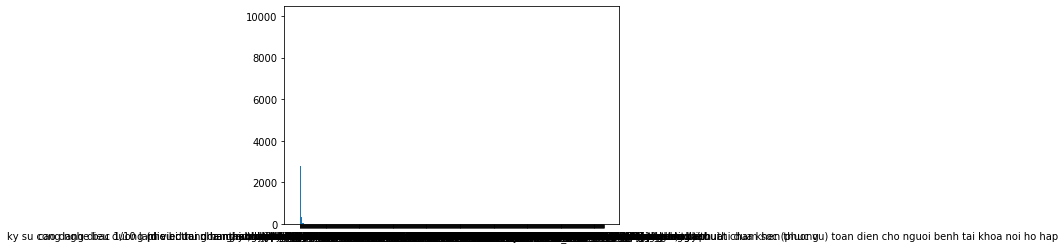

In [57]:
plt.bar(travail['Job'], travail['Frequence'])

In [ ]:
travail.to_csv('Job.csv', index = None, header=True)

In [ ]:
df["district"].value_counts() #712 

In [ ]:
df["age"] = (df["age_source1"] + df["age_source2"])/2

In [ ]:
# Calculer le fréquence
job = pd.DataFrame(df["maCv"].value_counts()).reset_index()
# Rename des colonnes #
job = job.rename(columns={"index": "Job", "maCv": "Frequency"})

In [ ]:
import re
import unidecode
import unicodedata

In [ ]:
def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [ ]:
def clean_accent(text): 
    clean = []
    for i in range(np.shape(text)[0]):
        mot = strip_accents(text[i])
        clean.append(mot)
    return(clean)

In [ ]:
df["Job"] = df["maCv"].apply(clean_accent)

In [ ]:
df.head()